**Python and Data Analytics Project**

In [ ]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sb

%matplotlib inline

In [ ]:
Train = pd.DataFrame(pd.read_csv('/content/train.csv'))
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Train.shape

(891, 12)

In [440]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
Alone            0
SibSp            0
Parch            0
AgeGroup       177
dtype: int64

In [ ]:
Train['FamilySize']=Train['SibSp']+Train['Parch']
Train.drop(['SibSp','Parch'], axis=1, inplace=True)
Train.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067,-0.301914
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.301914,0.217138,1.000000


In [ ]:
Train['Alone']=[0 if Train['FamilySize'][i]>0 else 1 for i in Train.index]
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,1


In [ ]:
Train.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [ ]:
Train[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


In [ ]:
Train['SibSp']=[1 if Train['FamilySize'][i]>0 else 0 for i in Train.index]
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,SibSp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,1,0


In [ ]:
Train.groupby(['SibSp'])['Survived'].mean()

SibSp
0    0.303538
1    0.505650
Name: Survived, dtype: float64

In [ ]:
Train[['SibSp','Fare']].corr()

,SibSp,Fare
SibSp,1.000000,0.271832
Fare,0.271832,1.000000


In [ ]:
Train['Parch']=[1 if Train['FamilySize'][i]>1 else 0 for i in Train.index]
Train

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,S,3,0,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C,0,1,0,0


In [ ]:
Train.groupby(['Parch'])['Survived'].mean()

Parch
0    0.361032
1    0.466321
Name: Survived, dtype: float64

In [ ]:
Train[['Parch','Fare']].corr()

,Parch,Fare
Parch,1.000000,0.166672
Fare,0.166672,1.000000


**Relationship between Gender and Number of Passenger**

In [ ]:
Train.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,SibSp,Parch
Sex,,,,,,,,,,,,,
female,314,314,314,314,261,314,314,97,312,314,314,314,314
male,577,577,577,577,453,577,577,107,577,577,577,577,577


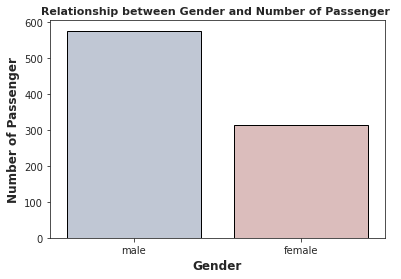

In [435]:
#define sex as gender
sb.countplot(x = "Sex", data = Train, palette='vlag', edgecolor = 'black')
plt.title("Relationship between Gender and Number of Passenger ",fontweight='bold',fontsize = 11)
plt.xlabel('Gender',fontweight='bold',fontsize = 12)
plt.ylabel('Number of Passenger',fontweight='bold',fontsize = 12)
plt.show()

From the graph showed, the number of male passenger is higher than female.

**Relationship between Gender and Survived**

In [ ]:
Train.groupby(['Sex','Survived']).count() 

PassengerId  Pclass  Name  ...  Alone  SibSp  Parch
Sex    Survived                             ...                     
female 0                  81      81    81  ...     81     81     81
       1                 233     233   233  ...    233    233    233
male   0                 468     468   468  ...    468    468    468
       1                 109     109   109  ...    109    109    109

[4 rows x 12 columns]

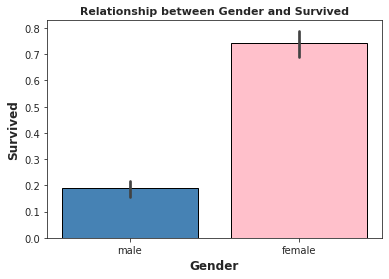

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [434]:
sb.barplot(x = "Sex", y = "Survived", data = Train)  # the 0 and 1 of Sex is represent male and female relatively
Survived = [0.188908, 0.742038]
bars = ('Male', 'Female')
Sex = np.arange(len(bars))
plt.bar(Sex, Survived, color=['steelblue', 'pink'], edgecolor = 'black')
plt.title("Relationship between Gender and Survived", fontweight='bold', fontsize = 11)
plt.xlabel('Gender', fontsize = 12, fontweight='bold')
plt.ylabel('Survived', fontsize = 12, fontweight='bold')
plt.show()
Train.groupby(['Sex'])['Survived'].mean()

From the graph above we can see that females have a much higher chance of survival than males which is 74.2% and 18.8% relatively.

In [445]:
Train[['Sex','Survived']].corr()

,Survived
Survived,1.0


**Relationship of the Number of Passenger Survived & Dead among the Gender**

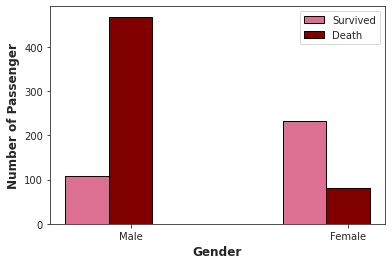

In [439]:
Survived=[109,233]
Dead=[468,81]

barwidth=0.2

r1 = np.arange(len(Survived))
r2 = [x+ barwidth for x in r1]

plt.bar(r1, Survived, width=barwidth, color='palevioletred',label='Survived', edgecolor = 'black')
plt.bar(r2, Dead, width=barwidth, color='maroon',label='Death', edgecolor = 'black')

plt.xticks([r+barwidth for r in range(len(Survived))],['Male','Female'])
plt.xlabel('Gender',fontweight='bold',fontsize = 12)
plt.ylabel('Number of Passenger',fontweight='bold',fontsize = 12)
plt.legend()

plt.show()

The survival rate of female is higher than male. Simultaneously, male have a higher mortality rate than female.

**Relationship between Pclass and Number of Passenger**

In [ ]:
Train.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,SibSp,Parch
Pclass,,,,,,,,,,,,,
1,216,216,216,216,186,216,216,176,214,216,216,216,216
2,184,184,184,184,173,184,184,16,184,184,184,184,184
3,491,491,491,491,355,491,491,12,491,491,491,491,491


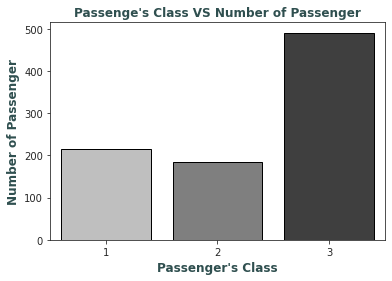

In [432]:
#define Pclass as Passenger's class
sb.countplot(x = "Pclass", data = Train, palette = 'binary', edgecolor = 'black')
plt.title('Passenge\'s Class VS Number of Passenger', fontweight='bold',fontsize = 12, color='darkslategrey')
plt.xlabel('Passenger\'s Class', fontweight='bold',fontsize = 12, color='darkslategrey')
plt.ylabel('Number of Passenger',fontweight='bold',fontsize = 12, color='darkslategrey')
plt.show()

We could see that third-class of cabin has the higest number of passenger.

**Relationship between Number of Passenger Survived and Pclass**

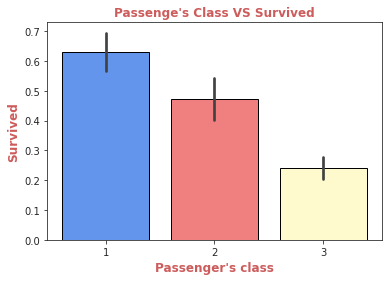

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [431]:
#define Pclass as Passenger's class
sb.barplot(x = "Pclass", y = "Survived", data = Train)
Survived = [0.629630, 0.472826, 0.242363]
bars = ('1', '2', '3')
Pclass = np.arange(len(bars))
plt.bar(Pclass, Survived, color=['cornflowerblue', 'lightcoral','lemonchiffon'], edgecolor = 'black')
plt.title('Passenge\'s Class VS Survived', fontweight='bold',fontsize = 12, color='indianred')
plt.xlabel('Passenger\'s class',fontweight='bold',fontsize = 12, color='indianred')
plt.ylabel('Survived',fontweight='bold',fontsize = 12, color='indianred')
plt.show()
df.groupby(['Pclass'])['Survived'].mean()

People with higher socioeconomic class had a higher rate of survival. Which 62.9% for first-class cabin, 47.3% for second-class cabin and 24.2% for third-class cabin.

**Relationship of the Number of Passenger Survived & Dead among the Pclass**

In [ ]:
Train.groupby(['Pclass','Survived']).count() 

PassengerId  Name  Sex  Age  ...  FamilySize  Alone  SibSp  Parch
Pclass Survived                               ...                                 
1      0                  80    80   80   64  ...          80     80     80     80
       1                 136   136  136  122  ...         136    136    136    136
2      0                  97    97   97   90  ...          97     97     97     97
       1                  87    87   87   83  ...          87     87     87     87
3      0                 372   372  372  270  ...         372    372    372    372
       1                 119   119  119   85  ...         119    119    119    119

[6 rows x 12 columns]

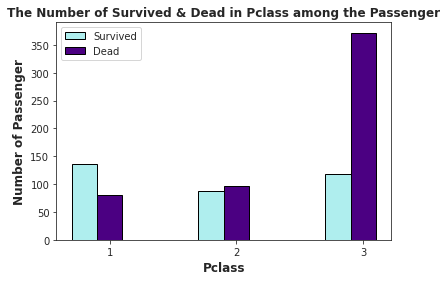

In [429]:
Survived=[136,87,119]
Death=[80,97,372]

barwidth=0.2

r1 = np.arange(len(Survived))
r2 = [x+ barwidth for x in r1]

plt.bar(r1, Survived, width=barwidth, color='paleturquoise',label='Survived', edgecolor = 'black')
plt.bar(r2, Death, width=barwidth, color='indigo',label='Dead', edgecolor = 'black')

plt.xticks([r+barwidth for r in range(len(Survived))],['1','2','3'])
plt.title('The Number of Survived & Dead in Pclass among the Passenger',fontweight='bold',fontsize = 12)
plt.xlabel('Pclass',fontweight='bold',fontsize = 12)
plt.ylabel('Number of Passenger',fontweight='bold',fontsize = 12)
plt.legend()

plt.show()

Compared with first-class cabin and second-class cabin, third-class cabin have the highest mortality rate.

In [ ]:
Train.groupby(['Sex','Pclass','Survived']).count() 

PassengerId  Name  Age  ...  Alone  SibSp  Parch
Sex    Pclass Survived                          ...                     
female 1      0                   3     3    3  ...      3      3      3
              1                  91    91   82  ...     91     91     91
       2      0                   6     6    6  ...      6      6      6
              1                  70    70   68  ...     70     70     70
       3      0                  72    72   55  ...     72     72     72
              1                  72    72   47  ...     72     72     72
male   1      0                  77    77   61  ...     77     77     77
              1                  45    45   40  ...     45     45     45
       2      0                  91    91   84  ...     91     91     91
              1                  17    17   15  ...     17     17     17
       3      0                 300   300  215  ...    300    300    300
              1                  47    47   38  ...     47     47     47

[12 rows x 11 columns]

In [444]:
Train[['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


**Relationship between Age and Passenger**

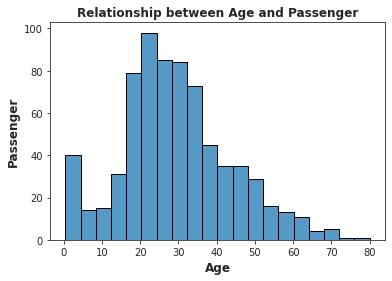

In [416]:
sb.histplot(x = "Age", data = Train, edgecolor = 'black')

plt.title('Relationship between Age and Passenger', fontsize = 12, fontweight = 'bold')
plt.xlabel('Age', fontsize = 12, fontweight = 'bold')
plt.ylabel('Passenger', fontsize = 12, fontweight = 'bold')

plt.show()

**Relationship between Age Group and the Number of Passenger**

In [ ]:
print(Train['Age'].max())
print(Train['Age'].min())

80.0
0.42


In [ ]:
bins = [-1, 0, 2, 12, 21, 33, 43, 60, np.inf]
Train['AgeGroup'] = pd.cut(Train['Age'],bins)
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult','Middle-Age Adult', 'Senior']
Train['AgeGroup'] = pd.cut(Train['Age'],bins,labels=labels)
Train['AgeGroup'].value_counts()

Young Adult         259
Teenager            135
Adult               127
Middle-Age Adult    102
Child                45
Baby                 24
Senior               22
Unknown               0
Name: AgeGroup, dtype: int64

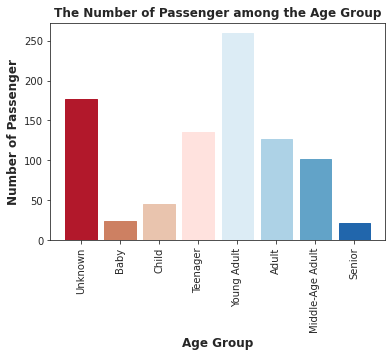

In [428]:
A = [177, 24, 45, 135, 259, 127, 102, 22]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult','Middle-Age Adult', 'Senior']
AgeGroup = np.arange(len(A))

barplot=plt.bar(labels, A)
barplot[0].set_color("#b2182b")
barplot[1].set_color("#cd8062")
barplot[2].set_color("#e9c4ae")
barplot[3].set_color("#ffe2de")
barplot[4].set_color("#dcecf5") 
barplot[5].set_color("#add2e6") 
barplot[6].set_color("#62a3c8") 
barplot[7].set_color("#2166ac")
plt.title('The Number of Passenger among the Age Group', fontweight='bold', fontsize = 12)
plt.xlabel('Age Group', fontweight='bold', fontsize = 12)
plt.ylabel('Number of Passenger', fontweight='bold', fontsize = 12)
plt.xticks(rotation= 90)
sb.set_style("ticks")

plt.show()

**Relationship between Age Group and Survived**

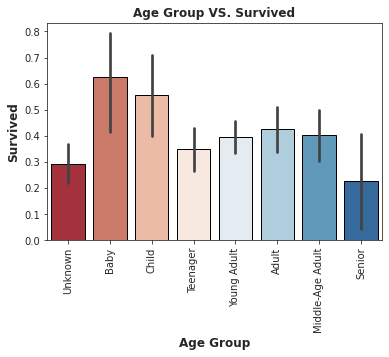

In [442]:
Train["Age"] = Train["Age"].fillna(-0.5)
bins = [-1, 0, 2, 12, 21, 33, 43, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult','Middle-Age Adult', 'Senior']
Train['AgeGroup'] = pd.cut(Train["Age"], bins, labels = labels)
#draw a bar plot of Age Group vs. survival
sb.barplot(x="AgeGroup", y="Survived", data=Train, palette='RdBu', edgecolor = 'black')
plt.title('Age Group VS. Survived', fontweight='bold', fontsize = 12)
plt.xlabel('Age Group', fontweight='bold', fontsize = 12)
plt.ylabel('Survived', fontweight='bold', fontsize = 12)
plt.xticks(rotation= 90)
plt.show()

**Relationship of the Number of Passenger Survived & Dead among the Age Group**

In [443]:
Train.groupby(['AgeGroup','Survived']).count() 

PassengerId  Pclass  Name  ...  Alone  SibSp  Parch
AgeGroup         Survived                             ...                     
Unknown          0                 125     125   125  ...    125    125    125
                 1                  52      52    52  ...     52     52     52
Baby             0                   9       9     9  ...      9      9      9
                 1                  15      15    15  ...     15     15     15
Child            0                  20      20    20  ...     20     20     20
                 1                  25      25    25  ...     25     25     25
Teenager         0                  88      88    88  ...     88     88     88
                 1                  47      47    47  ...     47     47     47
Young Adult      0                 156     156   156  ...    156    156    156
                 1                 103     103   103  ...    103    103    103
Adult            0                  73      73    73  ...     73     73     73
                 1                  54      54    54  ...     54     54     54
Middle-Age Adult 0                  61      61    61  ...     61     61     61
                 1                  41      41    41  ...     41     41     41
Senior           0                  17      17    17  ...     17     17     17
                 1                   5       5     5  ...      5      5      5

[16 rows x 13 columns]

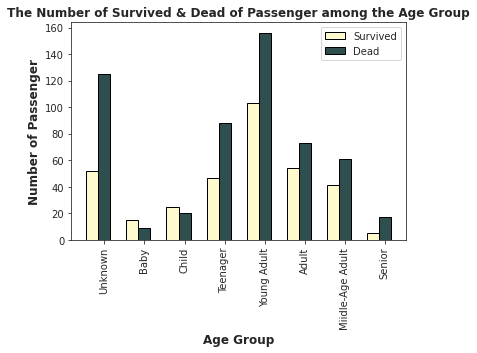

In [423]:
Survived=[52, 15, 25, 47, 103, 54, 41, 5 ]
Dead=[125, 9, 20, 88, 156, 73, 61, 17]

barwidth=0.3

r1 = np.arange(len(Survived))
r2 = [x+ barwidth for x in r1]

plt.bar(r1, Survived, width=barwidth, color='lemonchiffon',label='Survived', edgecolor = 'black')
plt.bar(r2, Dead, width=barwidth, color='darkslategray',label='Dead', edgecolor = 'black')

plt.xticks([r+barwidth for r in range(len(Survived))],['Unknown','Baby','Child','Teenager','Young Adult','Adult','Miidle-Age Adult','Senior'])
plt.title('The Number of Survived & Dead of Passenger among the Age Group',fontweight='bold',fontsize = 12)
plt.xlabel('Age Group',fontweight='bold',fontsize = 12)
plt.ylabel('Number of Passenger',fontweight='bold',fontsize = 12)
plt.xticks(rotation=90)
plt.legend()

plt.show()

Young adult have the highest survival rate but at the same time they also have the highest mortality rate. The second highest survival rate is adult followed by unknown,teenager, middle-age adult, child,baby and senior.

**Relation between Embarked Port and Number of Passenger**

In [ ]:
Train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamilySize,Alone,SibSp,Parch,AgeGroup
Embarked,,,,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,69,168,168,168,168,130
Q,77,77,77,77,77,28,77,77,4,77,77,77,77,28
S,644,644,644,644,644,554,644,644,129,644,644,644,644,554


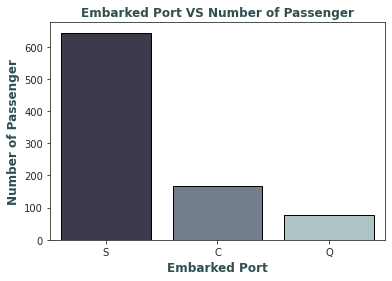

In [422]:
#define C= cherbourg, Q= queenstown, S=southampton

sb.countplot(x = "Embarked", data = Train, palette = 'bone', edgecolor = 'black')
plt.title('Embarked Port VS Number of Passenger', fontweight='bold',fontsize = 12, color='darkslategrey')
plt.xlabel('Embarked Port', fontweight='bold',fontsize = 12, color='darkslategrey')
plt.ylabel('Number of Passenger',fontweight='bold',fontsize = 12, color='darkslategrey')

plt.show()

It's clear that the majority of people embarked in Southampton (S).

**Relation between Embarked Port and Survived**

In [ ]:
Train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

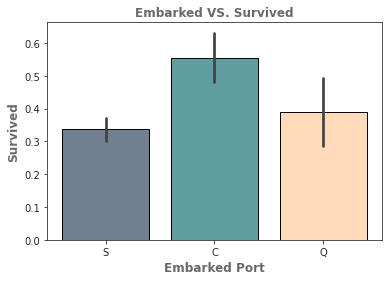

In [421]:
#define C= cherbourg, Q= queenstown, S=southampton

sb.barplot(x = "Embarked", y = "Survived", data = Train)
Survived = [0.336957, 0.553571, 0.389610]
bars = ('S', 'C', 'Q')
Embarked = np.arange(len(bars))
plt.bar(Embarked, Survived, color=['slategrey', 'cadetblue','peachpuff'], edgecolor = 'black')
plt.title('Embarked VS. Survived',fontweight='bold',fontsize = 12, color='dimgrey')
plt.xlabel('Embarked Port',fontweight='bold',fontsize = 12, color='dimgrey')
plt.ylabel('Survived',fontweight='bold',fontsize = 12, color='dimgrey')

plt.show()

The result showed that the cherbourg port has the highest survival rate than queenstown and southampton.

**Relationship of the Number of Passenger Survived & Dead among the Embarked Port**

In [ ]:
Train.groupby(['Embarked','Survived']).count() 

PassengerId  Pclass  Name  ...  SibSp  Parch  AgeGroup
Embarked Survived                             ...                        
C        0                  75      75    75  ...     75     75        51
         1                  93      93    93  ...     93     93        79
Q        0                  47      47    47  ...     47     47        20
         1                  30      30    30  ...     30     30         8
S        0                 427     427   427  ...    427    427       353
         1                 217     217   217  ...    217    217       201

[6 rows x 13 columns]

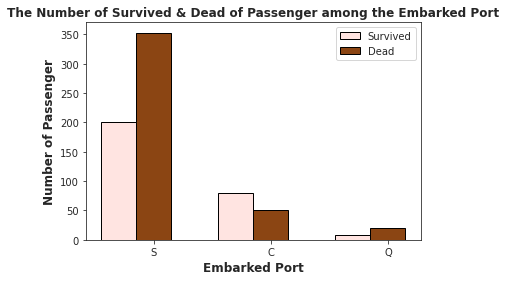

In [419]:
Survived=[201, 79, 8]
Dead=[353, 51, 20]

barwidth=0.3

r1 = np.arange(len(Survived))
r2 = [x+ barwidth for x in r1]

plt.bar(r1, Survived, width=barwidth, color='mistyrose',label='Survived', edgecolor = 'black')
plt.bar(r2, Dead, width=barwidth, color='saddlebrown',label='Dead', edgecolor = 'black')

plt.xticks([r+barwidth for r in range(len(Survived))],['S','C','Q'])
plt.title('The Number of Survived & Dead of Passenger among the Embarked Port',fontweight='bold',fontsize = 12)
plt.xlabel('Embarked Port',fontweight='bold',fontsize = 12)
plt.ylabel('Number of Passenger',fontweight='bold',fontsize = 12)
plt.legend()

plt.show()

**Summary of the training dataset**

In [ ]:
Train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,SibSp,Parch,AgeGroup
count,891.000000,891.000000,891.000000,891,891,714.000000,891,891.000000,204,889,891.000000,891.000000,891.000000,891.000000,714
unique,NaN,NaN,NaN,891,2,NaN,681,NaN,147,3,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,"Davies, Mr. Alfred J",male,NaN,347082,NaN,C23 C25 C27,S,NaN,NaN,NaN,NaN,Young Adult
freq,NaN,NaN,NaN,1,577,NaN,7,NaN,4,644,NaN,NaN,NaN,NaN,259
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,NaN,32.204208,NaN,NaN,0.904602,0.602694,0.397306,0.216611,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,NaN,49.693429,NaN,NaN,1.613459,0.489615,0.489615,0.412166,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,NaN,7.910400,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,NaN,14.454200,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,NaN,31.000000,NaN,NaN,1.000000,1.000000,1.000000,0.000000,NaN


*   There are a total of 891 passengers in the training set.
*   The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.

*   The Embarked feature is missing 0.22% of its values, which should be relatively harmless.












**CONCLUSION**

*   There are a total of 891 passengers in the training set.
*   The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.

*   The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

*   From the graph showed, the number of male passenger is higher than female.
*   From the graph above we can see that females have a much higher chance of survival than males which is 74.2% and 18.8% relatively.

*   The survival rate of female is higher than male. Simultaneously, male have a higher mortality rate than female.
*   We could see that third-class of cabin has the higest number of passenger.

*   People with higher socioeconomic class had a higher rate of survival. Which 62.9% for first-class cabin, 47.3% for second-class cabin and 24.2% for third-class cabin.
*   Compared with first-class cabin and second-class cabin, third-class cabin have the highest mortality rate.

*   Young adult have the highest survival rate but at the same time they also have the highest mortality rate. The second highest survival rate is adult followed by unknown,teenager, middle-age adult, child,baby and senior.
*   The majority of people embarked in Southampton (S).

*   The result showed that the cherbourg port has the highest survival rate than queenstown and southampton.









